In [27]:
from tifffile import TiffFile
import os
import numpy as np
import sys
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
import utilities as rocku
import matplotlib.pyplot as plt
from pprint import pprint
import pandas as pd

In [2]:
# %matplotlib notebook
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [5]:
# need to change
ipts="23768"
# scan_type = 'ct_scans'
# scan_type = 'radiographs'
scan_type = 'alignment_calibration'

In [6]:
scan_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/" + scan_type
sorted(os.listdir(scan_loc))

['06_29_21_OB',
 '06_29_21_dark_field',
 '20200618_INL_mask_8dot2mm_alignment_RotSmall2_22:53:53.csv',
 '2021_01_04_resolution',
 '2021_02_25',
 '2021_03_25',
 '2021_04_14',
 '2021_04_15',
 '2021_04_17',
 '2021_04_18',
 '2021_04_18_resolution',
 '2021_04_22',
 '2021_04_22_BN_PLA',
 '2021_04_27_light',
 '2021_05_25',
 '2021_06_11_beam_size',
 '2021_06_11_zeiss_focus',
 '2021_06_14_furnace_position',
 '2021_07_01',
 '2021_07_01_metals',
 '2021_07_07_Cu_fastCT',
 '2021_07_07_sCMOS_fastCT_test_RBV',
 '2021_07_07_sCMOS_focus',
 '2021_07_07_sCMOS_resolution',
 '2021_09_04_mono_test',
 '2021_09_21_NewCCD_test',
 '2021_09_22',
 '2022_01_04_flux',
 '2022_01_04_resolution',
 '2022_01_06_chopper',
 '2022_01_11_realign_detector',
 '2022_01_13_HEA_CT',
 '2022_01_13_neutron_eater',
 '2022_01_14_light_tightness',
 '2022_01_26_focus_zeiss',
 '2022_04_05_ob',
 '2022_09_29_startup',
 '2022_11_08_QHY_closing_slits',
 '2022_11_08_QHY_lighttight',
 '2022_11_08_light_tight_check',
 '2023_05_23_QHYS',
 '2023

In [7]:
sample_name = "2024_06_29_pinhole_scan_120s"
scan_dir = os.path.join(scan_loc, sample_name)

In [8]:
fname_list = os.listdir(scan_dir)
# fname_list.pop(0)
fname_list.sort()
fname_list

['scan00_16mm_253.800_0120_2399.tiff',
 'scan00_16mm_253.900_0120_2400.tiff',
 'scan00_16mm_254.000_0120_2401.tiff',
 'scan00_16mm_254.100_0120_2402.tiff',
 'scan00_16mm_254.200_0120_2403.tiff',
 'scan00_16mm_254.300_0120_2404.tiff',
 'scan00_16mm_254.400_0120_2405.tiff',
 'scan00_16mm_254.500_0120_2406.tiff',
 'scan00_16mm_254.600_0120_2407.tiff',
 'scan00_16mm_254.700_0120_2408.tiff',
 'scan00_16mm_254.800_0120_2409.tiff',
 'scan01_11mm_219.500_0120_2410.tiff',
 'scan01_11mm_219.600_0120_2411.tiff',
 'scan01_11mm_219.700_0120_2412.tiff',
 'scan01_11mm_219.800_0120_2413.tiff',
 'scan01_11mm_219.900_0120_2414.tiff',
 'scan01_11mm_220.000_0120_2415.tiff',
 'scan01_11mm_220.100_0120_2416.tiff',
 'scan01_11mm_220.200_0120_2417.tiff',
 'scan01_11mm_220.300_0120_2418.tiff',
 'scan01_11mm_220.400_0120_2419.tiff',
 'scan01_11mm_220.500_0120_2420.tiff',
 'scan02_8.2mm_189.200_0120_2421.tiff',
 'scan02_8.2mm_189.300_0120_2422.tiff',
 'scan02_8.2mm_189.400_0120_2423.tiff',
 'scan02_8.2mm_189.500

In [22]:
lookup_tags = ['BMCounterRate', 'BMCounter', 'MotAperture']

In [40]:
meta_dict = {}
for e_tif in fname_list:
    meta_dict[e_tif] = {}
    with TiffFile(os.path.join(scan_dir, e_tif)) as tif:
        for page in tif.pages:
            for tag in page.tags:
                tag_name, tag_value = tag.name, tag.value
                if type(tag_value) == str and ':' in tag_value:
                    tag_name = tag_value.split(':')[0]
                    tag_value = tag_value.split(':')[1]
                if tag_name in lookup_tags:
                    meta_dict[e_tif][tag_name] = float(tag_value)
                print("NAME:", tag_name)
                print("VALUE:", tag_value)

NAME: ImageWidth
VALUE: 6400
NAME: ImageLength
VALUE: 6400
NAME: BitsPerSample
VALUE: 16
NAME: Compression
VALUE: COMPRESSION.NONE
NAME: PhotometricInterpretation
VALUE: PHOTOMETRIC.MINISBLACK
NAME: Make
VALUE: Unknown
NAME: Model
VALUE: Unknown
NAME: StripOffsets
VALUE: (8,)
NAME: SamplesPerPixel
VALUE: 1
NAME: RowsPerStrip
VALUE: 6400
NAME: StripByteCounts
VALUE: (81920000,)
NAME: PlanarConfiguration
VALUE: PLANARCONFIG.CONTIG
NAME: Software
VALUE: EPICS areaDetector
NAME: SampleFormat
VALUE: SAMPLEFORMAT.UINT
NAME: 65000
VALUE: 1088543600.0389102
NAME: 65001
VALUE: 1
NAME: 65002
VALUE: 1088543600
NAME: 65003
VALUE: 38911227
NAME: FileNameStr
VALUE: scan00_16mm_253.800
NAME: InstrumentStr
VALUE: CG1D
NAME: IPTS
VALUE: 32055
NAME: ITEMS
VALUE: -1
NAME: ITEMSAdditionalStr
VALUE: 91978,91976,91981
NAME: SampleDescStr
VALUE: 1B
NAME: NotesStr
VALUE: 2024-06-11 15
NAME: DataSetStr
VALUE: 2D
NAME: DataAcqModeStr
VALUE: White Beam
NAME: DataTypeStr
VALUE: Raw
NAME: GroupID
VALUE: 1185655
NA

VALUE: 1.000000
NAME: MotZaberRot.RBV
VALUE: 0.000000
NAME: MotZaberRot
VALUE: 0.000000
NAME: MotCameraVert.RBV
VALUE: 2.674662
NAME: MotCameraVert
VALUE: 2.674662
NAME: MotHoriTrans.RBV
VALUE: 28.000000
NAME: MotHoriTrans
VALUE: 28.000000
NAME: MotVertTrans.RBV
VALUE: 60.000000
NAME: MotVertTrans
VALUE: 60.000000
NAME: MotDiffuser.RBV
VALUE: 178.400000
NAME: MotDiffuser
VALUE: 178.400000
NAME: MotAperture.RBV
VALUE: 254.200000
NAME: MotAperture
VALUE: 254.200000
NAME: MotSlitVB.RBV
VALUE: 42.400000
NAME: MotSlitVB
VALUE: 42.400000
NAME: MotSlitVT.RBV
VALUE: 42.800000
NAME: MotSlitVT
VALUE: 42.800000
NAME: MotSlitHR.RBV
VALUE: 41.400000
NAME: MotSlitHR
VALUE: 41.400000
NAME: MotSlitHL.RBV
VALUE: 42.400000
NAME: MotSlitHL
VALUE: 42.400000
NAME: MotG0X.RBV
VALUE: 100.000000
NAME: MotG0X
VALUE: 100.000000
NAME: MotG1Z.RBV
VALUE: 50.000000
NAME: MotG1Z
VALUE: 50.000000
NAME: MotG1X.RBV
VALUE: 0.000000
NAME: MotG1X
VALUE: 0.000000
NAME: BMCounter
VALUE: 1769304
NAME: BMCounterRate
VALUE: 14

VALUE: 0.000000
NAME: PolPS6Current
VALUE: 0.000000
NAME: PartlowSetpoint
VALUE: 0
NAME: PartlowTemperature
VALUE: 0.000000
NAME: GasPanelPressure1
VALUE: 0.000000
NAME: GasPanelPressure2
VALUE: 0.000000
NAME: GasPanelPressure3
VALUE: 0.000000
NAME: GasPanelPressure4
VALUE: 0.000000
NAME: ImagingFurnaceSetpointTemp
VALUE: 0.000000
NAME: ImagingFurnaceSampleTemp
VALUE: 0.000000
NAME: ImagingFurnaceRampRate
VALUE: 0.000000
NAME: ImagingFurnaceRotation
VALUE: 0.000000
NAME: ImagingFurnaceRotation.RBV
VALUE: 0.000000
NAME: NSR_Index
VALUE: 22876.000000
NAME: NSR_time
VALUE: 22898.455330
NAME: NSR_TUSBR
VALUE: -244.020000
NAME: NSR_TRADS
VALUE: -244.020000
NAME: NSR_TDSTR
VALUE: -244.020000
NAME: NSR_TDSBL
VALUE: -244.020000
NAME: NSR_LockInOut
VALUE: 0.000000
NAME: NSR_SetPoint
VALUE: 0.650000
NAME: NSR_P
VALUE: 0.600000
NAME: NSR_It
VALUE: 0.016000
NAME: NSR_Dt
VALUE: 0.000000
NAME: NSR_PIDdt
VALUE: -1.000000
NAME: NSR_PIDOut
VALUE: 0.850000
NAME: NSR_CurrentOut
VALUE: 0.000000
NAME: NSR_

NAME: NotesStr
VALUE: 2024-06-11 15
NAME: DataSetStr
VALUE: 2D
NAME: DataAcqModeStr
VALUE: White Beam
NAME: DataTypeStr
VALUE: Raw
NAME: GroupID
VALUE: 1185655
NAME: GroupSize
VALUE: 1
NAME: RunNo
VALUE: 0
NAME: FrameIndex
VALUE: 1
NAME: FrameSize
VALUE: 1
NAME: ModelStr
VALUE: QHY600M-1f52a9418cc59b9f3
NAME: ManufacturerStr
VALUE: QHY
NAME: ExposureTime
VALUE: 120.000000
NAME: ExposurePeriod
VALUE: 0.000000
NAME: NumExposures
VALUE: 1
NAME: NumImages
VALUE: 1
NAME: ImageCounter
VALUE: 6
NAME: MinX
VALUE: 1500
NAME: MinY
VALUE: 0
NAME: SizeX
VALUE: 6400
NAME: SizeY
VALUE: 6400
NAME: Temperature
VALUE: 0.000000
NAME: TemperatureActual
VALUE: 0.000000
NAME: MotScanDeviceStr
VALUE: Small Rot 3
NAME: RotationActual
VALUE: 0.000000
NAME: MotLiftTable.RBV
VALUE: 0.000000
NAME: MotLiftTable
VALUE: 0.000000
NAME: MotShortAxis.RBV
VALUE: 49.996000
NAME: MotShortAxis
VALUE: 49.996000
NAME: MotRotTable.RBV
VALUE: 216.113000
NAME: MotRotTable
VALUE: 216.113000
NAME: MotSmallRotTable.RBV
VALUE: 1.0

VALUE: PHOTOMETRIC.MINISBLACK
NAME: Make
VALUE: Unknown
NAME: Model
VALUE: Unknown
NAME: StripOffsets
VALUE: (8,)
NAME: SamplesPerPixel
VALUE: 1
NAME: RowsPerStrip
VALUE: 6400
NAME: StripByteCounts
VALUE: (81920000,)
NAME: PlanarConfiguration
VALUE: PLANARCONFIG.CONTIG
NAME: Software
VALUE: EPICS areaDetector
NAME: SampleFormat
VALUE: SAMPLEFORMAT.UINT
NAME: 65000
VALUE: 1088546355.6173048
NAME: 65001
VALUE: 1
NAME: 65002
VALUE: 1088546355
NAME: 65003
VALUE: 617306170
NAME: FileNameStr
VALUE: scan02_8.2mm_189.200
NAME: InstrumentStr
VALUE: CG1D
NAME: IPTS
VALUE: 32055
NAME: ITEMS
VALUE: -1
NAME: ITEMSAdditionalStr
VALUE: 91978,91976,91981
NAME: SampleDescStr
VALUE: 1B
NAME: NotesStr
VALUE: 2024-06-11 15
NAME: DataSetStr
VALUE: 2D
NAME: DataAcqModeStr
VALUE: White Beam
NAME: DataTypeStr
VALUE: Raw
NAME: GroupID
VALUE: 1185655
NAME: GroupSize
VALUE: 1
NAME: RunNo
VALUE: 0
NAME: FrameIndex
VALUE: 1
NAME: FrameSize
VALUE: 1
NAME: ModelStr
VALUE: QHY600M-1f52a9418cc59b9f3
NAME: Manufacturer

VALUE: 255
NAME: QHYBitDepth
VALUE: 16
NAME: QHYTEPower
VALUE: 34.000000
NAME: ImageWidth
VALUE: 6400
NAME: ImageLength
VALUE: 6400
NAME: BitsPerSample
VALUE: 16
NAME: Compression
VALUE: COMPRESSION.NONE
NAME: PhotometricInterpretation
VALUE: PHOTOMETRIC.MINISBLACK
NAME: Make
VALUE: Unknown
NAME: Model
VALUE: Unknown
NAME: StripOffsets
VALUE: (8,)
NAME: SamplesPerPixel
VALUE: 1
NAME: RowsPerStrip
VALUE: 6400
NAME: StripByteCounts
VALUE: (81920000,)
NAME: PlanarConfiguration
VALUE: PLANARCONFIG.CONTIG
NAME: Software
VALUE: EPICS areaDetector
NAME: SampleFormat
VALUE: SAMPLEFORMAT.UINT
NAME: 65000
VALUE: 1088547100.563938
NAME: 65001
VALUE: 7
NAME: 65002
VALUE: 1088547100
NAME: 65003
VALUE: 563939049
NAME: FileNameStr
VALUE: scan02_8.2mm_189.800
NAME: InstrumentStr
VALUE: CG1D
NAME: IPTS
VALUE: 32055
NAME: ITEMS
VALUE: -1
NAME: ITEMSAdditionalStr
VALUE: 91978,91976,91981
NAME: SampleDescStr
VALUE: 1B
NAME: NotesStr
VALUE: 2024-06-11 15
NAME: DataSetStr
VALUE: 2D
NAME: DataAcqModeStr
VALU

VALUE: 22898.455330
NAME: NSR_TUSBR
VALUE: -244.020000
NAME: NSR_TRADS
VALUE: -244.020000
NAME: NSR_TDSTR
VALUE: -244.020000
NAME: NSR_TDSBL
VALUE: -244.020000
NAME: NSR_LockInOut
VALUE: 0.000000
NAME: NSR_SetPoint
VALUE: 0.650000
NAME: NSR_P
VALUE: 0.600000
NAME: NSR_It
VALUE: 0.016000
NAME: NSR_Dt
VALUE: 0.000000
NAME: NSR_PIDdt
VALUE: -1.000000
NAME: NSR_PIDOut
VALUE: 0.850000
NAME: NSR_CurrentOut
VALUE: 0.000000
NAME: NSR_VCoilSet
VALUE: -0.499116
NAME: NSR_VCoilOut
VALUE: -0.001895
NAME: NSR_LCoilSet
VALUE: -0.501796
NAME: NSR_LCoilOut
VALUE: -0.004526
NAME: NSR_BDSTL
VALUE: 0.162028
NAME: NSR_BDSTR
VALUE: 0.132718
NAME: NSR_BDSBR
VALUE: -0.183254
NAME: NSR_BUSTL
VALUE: -0.146214
NAME: NSR_BDSBL
VALUE: -0.017377
NAME: NSR_BUSTR
VALUE: 0.794617
NAME: NSR_BUSBR
VALUE: 1.150529
NAME: NSR_BUSBL
VALUE: 0.979176
NAME: NSR_LVExpTime
VALUE: 60.000000
NAME: NSR_LockInMean
VALUE: 0.000000
NAME: NSR_LockInStd
VALUE: 0.000000
NAME: NSR_TargetState
VALUE: 0.000000
NAME: QHYReadMode
VALUE: 1
NA

NAME: NSR_BDSTR
VALUE: 0.132718
NAME: NSR_BDSBR
VALUE: -0.183254
NAME: NSR_BUSTL
VALUE: -0.146214
NAME: NSR_BDSBL
VALUE: -0.017377
NAME: NSR_BUSTR
VALUE: 0.794617
NAME: NSR_BUSBR
VALUE: 1.150529
NAME: NSR_BUSBL
VALUE: 0.979176
NAME: NSR_LVExpTime
VALUE: 60.000000
NAME: NSR_LockInMean
VALUE: 0.000000
NAME: NSR_LockInStd
VALUE: 0.000000
NAME: NSR_TargetState
VALUE: 0.000000
NAME: QHYReadMode
VALUE: 1
NAME: QHYReadoutMode
VALUE: 1
NAME: QHYOffset
VALUE: 255
NAME: QHYBitDepth
VALUE: 16
NAME: QHYTEPower
VALUE: 34.000000
NAME: ImageWidth
VALUE: 6400
NAME: ImageLength
VALUE: 6400
NAME: BitsPerSample
VALUE: 16
NAME: Compression
VALUE: COMPRESSION.NONE
NAME: PhotometricInterpretation
VALUE: PHOTOMETRIC.MINISBLACK
NAME: Make
VALUE: Unknown
NAME: Model
VALUE: Unknown
NAME: StripOffsets
VALUE: (8,)
NAME: SamplesPerPixel
VALUE: 1
NAME: RowsPerStrip
VALUE: 6400
NAME: StripByteCounts
VALUE: (81920000,)
NAME: PlanarConfiguration
VALUE: PLANARCONFIG.CONTIG
NAME: Software
VALUE: EPICS areaDetector
NAME:

NAME: ImageLength
VALUE: 6400
NAME: BitsPerSample
VALUE: 16
NAME: Compression
VALUE: COMPRESSION.NONE
NAME: PhotometricInterpretation
VALUE: PHOTOMETRIC.MINISBLACK
NAME: Make
VALUE: Unknown
NAME: Model
VALUE: Unknown
NAME: StripOffsets
VALUE: (8,)
NAME: SamplesPerPixel
VALUE: 1
NAME: RowsPerStrip
VALUE: 6400
NAME: StripByteCounts
VALUE: (81920000,)
NAME: PlanarConfiguration
VALUE: PLANARCONFIG.CONTIG
NAME: Software
VALUE: EPICS areaDetector
NAME: SampleFormat
VALUE: SAMPLEFORMAT.UINT
NAME: 65000
VALUE: 1088548972.737317
NAME: 65001
VALUE: 11
NAME: 65002
VALUE: 1088548972
NAME: 65003
VALUE: 737318332
NAME: FileNameStr
VALUE: scan03_4.1mm_163.500
NAME: InstrumentStr
VALUE: CG1D
NAME: IPTS
VALUE: 32055
NAME: ITEMS
VALUE: -1
NAME: ITEMSAdditionalStr
VALUE: 91978,91976,91981
NAME: SampleDescStr
VALUE: 1B
NAME: NotesStr
VALUE: 2024-06-11 15
NAME: DataSetStr
VALUE: 2D
NAME: DataAcqModeStr
VALUE: White Beam
NAME: DataTypeStr
VALUE: Raw
NAME: GroupID
VALUE: 1185655
NAME: GroupSize
VALUE: 1
NAME

NAME: FileNameStr
VALUE: scan04_3.3mm_138.700
NAME: InstrumentStr
VALUE: CG1D
NAME: IPTS
VALUE: 32055
NAME: ITEMS
VALUE: -1
NAME: ITEMSAdditionalStr
VALUE: 91978,91976,91981
NAME: SampleDescStr
VALUE: 1B
NAME: NotesStr
VALUE: 2024-06-11 15
NAME: DataSetStr
VALUE: 2D
NAME: DataAcqModeStr
VALUE: White Beam
NAME: DataTypeStr
VALUE: Raw
NAME: GroupID
VALUE: 1185655
NAME: GroupSize
VALUE: 1
NAME: RunNo
VALUE: 0
NAME: FrameIndex
VALUE: 1
NAME: FrameSize
VALUE: 1
NAME: ModelStr
VALUE: QHY600M-1f52a9418cc59b9f3
NAME: ManufacturerStr
VALUE: QHY
NAME: ExposureTime
VALUE: 120.000000
NAME: ExposurePeriod
VALUE: 0.000000
NAME: NumExposures
VALUE: 1
NAME: NumImages
VALUE: 1
NAME: ImageCounter
VALUE: 6
NAME: MinX
VALUE: 1500
NAME: MinY
VALUE: 0
NAME: SizeX
VALUE: 6400
NAME: SizeY
VALUE: 6400
NAME: Temperature
VALUE: 0.000000
NAME: TemperatureActual
VALUE: 0.000000
NAME: MotScanDeviceStr
VALUE: Small Rot 3
NAME: RotationActual
VALUE: 0.000000
NAME: MotLiftTable.RBV
VALUE: 0.000000
NAME: MotLiftTable
V

VALUE: 216.113000
NAME: MotRotTable
VALUE: 216.113000
NAME: MotSmallRotTable.RBV
VALUE: 1.000000
NAME: MotSmallRotTable
VALUE: 1.000000
NAME: MotZaberRot.RBV
VALUE: 0.000000
NAME: MotZaberRot
VALUE: 0.000000
NAME: MotCameraVert.RBV
VALUE: 2.674662
NAME: MotCameraVert
VALUE: 2.674662
NAME: MotHoriTrans.RBV
VALUE: 28.000000
NAME: MotHoriTrans
VALUE: 28.000000
NAME: MotVertTrans.RBV
VALUE: 60.000000
NAME: MotVertTrans
VALUE: 60.000000
NAME: MotDiffuser.RBV
VALUE: 178.400000
NAME: MotDiffuser
VALUE: 178.400000
NAME: MotAperture.RBV
VALUE: 139.200000
NAME: MotAperture
VALUE: 139.200000
NAME: MotSlitVB.RBV
VALUE: 42.400000
NAME: MotSlitVB
VALUE: 42.400000
NAME: MotSlitVT.RBV
VALUE: 42.800000
NAME: MotSlitVT
VALUE: 42.800000
NAME: MotSlitHR.RBV
VALUE: 41.400000
NAME: MotSlitHR
VALUE: 41.400000
NAME: MotSlitHL.RBV
VALUE: 42.400000
NAME: MotSlitHL
VALUE: 42.400000
NAME: MotG0X.RBV
VALUE: 100.000000
NAME: MotG0X
VALUE: 100.000000
NAME: MotG1Z.RBV
VALUE: 50.000000
NAME: MotG1Z
VALUE: 50.000000
NA

In [41]:
pprint(meta_dict)

{'scan00_16mm_253.800_0120_2399.tiff': {'BMCounter': 1775539.0,
                                        'BMCounterRate': 14464.0,
                                        'MotAperture': 253.8},
 'scan00_16mm_253.900_0120_2400.tiff': {'BMCounter': 1774483.0,
                                        'BMCounterRate': 14553.0,
                                        'MotAperture': 253.9},
 'scan00_16mm_254.000_0120_2401.tiff': {'BMCounter': 1771665.0,
                                        'BMCounterRate': 14233.0,
                                        'MotAperture': 254.0},
 'scan00_16mm_254.100_0120_2402.tiff': {'BMCounter': 1772108.0,
                                        'BMCounterRate': 14675.0,
                                        'MotAperture': 254.1},
 'scan00_16mm_254.200_0120_2403.tiff': {'BMCounter': 1769304.0,
                                        'BMCounterRate': 14457.0,
                                        'MotAperture': 254.2},
 'scan00_16mm_254.300_0120_2404.tif

In [42]:
meta_df = pd.DataFrame.from_dict(meta_dict, orient='index')

In [44]:
meta_df

,MotAperture,BMCounter,BMCounterRate
scan00_16mm_253.800_0120_2399.tiff,253.8,1775539.0,14464.0
scan00_16mm_253.900_0120_2400.tiff,253.9,1774483.0,14553.0
scan00_16mm_254.000_0120_2401.tiff,254.0,1771665.0,14233.0
scan00_16mm_254.100_0120_2402.tiff,254.1,1772108.0,14675.0
scan00_16mm_254.200_0120_2403.tiff,254.2,1769304.0,14457.0
scan00_16mm_254.300_0120_2404.tiff,254.3,1772584.0,14659.0
scan00_16mm_254.400_0120_2405.tiff,254.4,1772834.0,14527.0
scan00_16mm_254.500_0120_2406.tiff,254.5,1773172.0,14481.0
scan00_16mm_254.600_0120_2407.tiff,254.6,1776373.0,14684.0
scan00_16mm_254.700_0120_2408.tiff,254.7,1776552.0,14676.0


In [50]:
meta_df['Rate'] = meta_df['BMCounter']/120

In [52]:
BM_eff = 7.59E-6

In [53]:
meta_df['Neutrons'] = meta_df['Rate']/BM_eff

In [54]:
meta_df

,MotAperture,BMCounter,BMCounterRate,Rate,Neutrons
scan00_16mm_253.800_0120_2399.tiff,253.8,1775539.0,14464.0,14796.158333,1.949428e+09
scan00_16mm_253.900_0120_2400.tiff,253.9,1774483.0,14553.0,14787.358333,1.948269e+09
scan00_16mm_254.000_0120_2401.tiff,254.0,1771665.0,14233.0,14763.875000,1.945175e+09
scan00_16mm_254.100_0120_2402.tiff,254.1,1772108.0,14675.0,14767.566667,1.945661e+09
scan00_16mm_254.200_0120_2403.tiff,254.2,1769304.0,14457.0,14744.200000,1.942582e+09
scan00_16mm_254.300_0120_2404.tiff,254.3,1772584.0,14659.0,14771.533333,1.946184e+09
scan00_16mm_254.400_0120_2405.tiff,254.4,1772834.0,14527.0,14773.616667,1.946458e+09
scan00_16mm_254.500_0120_2406.tiff,254.5,1773172.0,14481.0,14776.433333,1.946829e+09
scan00_16mm_254.600_0120_2407.tiff,254.6,1776373.0,14684.0,14803.108333,1.950344e+09
scan00_16mm_254.700_0120_2408.tiff,254.7,1776552.0,14676.0,14804.600000,1.950540e+09


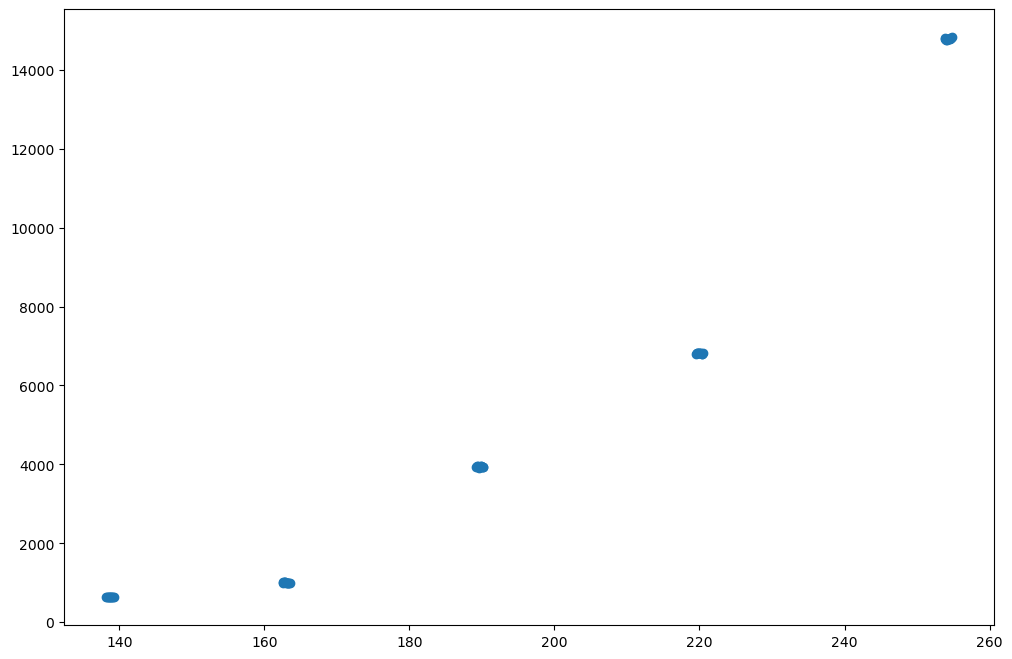

In [59]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['BMCounterRate'], )  # Plot some data on the Axes.
ax.scatter(meta_df['MotAperture'], meta_df['Rate'])  # Plot some data on the Axes.
# ax.set_yscale('log')
# ax.set_xscale('log')
# plt.show()   

In [63]:
meta_df.to_csv('test')